In [1]:
# import dependencies
import time
import datetime
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy

In [2]:
# define range of latitude and Longitude to select locations
lat = range(-90,90,5)
lon = range(-180,180,10)
# extract current date for use as analysis date
current_date = datetime.date.today().strftime('%m/%d/%Y')

In [3]:
# create list of locations with latitude and longitude
loc = [(x,y) for x in lat for y in lon]
# create cities as a list to hold nearest cities based on the Latitude and Longitude
cities = []
# use citipy to find the nearest cities and associated country codes based on the Latitude and Longitude
for lat,lon in loc:
    city_found = citipy.nearest_city(lat,lon)
    cityname = city_found.city_name
    countrycode = city_found.country_code
    # add the city name and country code only when it doesn't exist in the list of cities
    if (cityname,countrycode) not in cities:
        cities.append((cityname,countrycode))

In [4]:
# create a list to hold retrieved data
results = []
# define API endpoint, key and unit value
url = 'http://api.openweathermap.org/data/2.5/weather?'
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
unit = 'imperial'
record_count = 0
# print the header of the data retrieval log
print('Beginning Data Retrieval')
print('-' * 130)
# call API and save retrived data for all the cities
for city,country in cities:
    query = url + "appid=" + api_key + '&units=' + unit + '&q=' + city + ',' + country
    response = req.get(query).json()
    # only save data when the city name is found.  If not found or receive error code 404, skip the city
    if response['cod'] != '404':
        results.append(response)
        # count the number of records retrieved
        record_count += 1
        # print data retrieval log with count of record, city number, city name and requested URL
        print('Processing Record ' + str(record_count) + ' | city number: '  + str(response['id']) + ' | city name: ' + response['name'])
        print(query)
    # since the free key only allows us to call API 60 times in a minute, pause the call every second to avoid breaching the limit
    time.sleep(1)
# print the end of retrieval log
print('-' * 130)
print('Data Retrieval Complete - ' + str(record_count) + ' records have been retrieved.')
print('-' * 130)

Beginning Data Retrieval
----------------------------------------------------------------------------------------------------------------------------------
Processing Record 1 | city number: 4032243 | city name: Vaini
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vaini,to
Processing Record 2 | city number: 4030556 | city name: Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf
Processing Record 3 | city number: 3874787 | city name: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=punta arenas,cl
Processing Record 4 | city number: 3833367 | city name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar
Processing Record 5 | city number: 3366880 | city name: Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1

Processing Record 45 | city number: 2206900 | city name: Westport
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=westport,nz
Processing Record 46 | city number: 3883457 | city name: Lebu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lebu,cl
Processing Record 47 | city number: 3873441 | city name: Rengo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rengo,cl
Processing Record 48 | city number: 3861344 | city name: Chivilcoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chivilcoy,ar
Processing Record 49 | city number: 3451138 | city name: Rio Grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rio grande,br
Processing Record 50 | city number: 3355672 | city name: Luderitz
http://api.openweathermap.org/data/2.

Processing Record 90 | city number: 3887127 | city name: Iquique
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=iquique,cl
Processing Record 91 | city number: 3867427 | city name: Mayor Pablo Lagerenza
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mayor pablo lagerenza,py
Processing Record 92 | city number: 3466970 | city name: Cardoso
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cardoso,br
Processing Record 93 | city number: 3447779 | city name: Serra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=serra,br
Processing Record 94 | city number: 3466980 | city name: Caravelas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=caravelas,br
Processing Record 95 | city number: 2411397 | city name: Georgetown
http://ap

Processing Record 135 | city number: 145531 | city name: Saurimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saurimo,ao
Processing Record 136 | city number: 908913 | city name: Luwingu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luwingu,zm
Processing Record 137 | city number: 878281 | city name: Lindi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lindi,tz
Processing Record 138 | city number: 1082243 | city name: Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ambilobe,mg
Processing Record 139 | city number: 241131 | city name: Victoria
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=victoria,sc
Processing Record 140 | city number: 1622318 | city name: Waingapu
http://api.openweathermap.org/data/2.

Processing Record 181 | city number: 2094027 | city name: Kieta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kieta,pg
Processing Record 182 | city number: 5855927 | city name: Hilo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hilo,us
Processing Record 183 | city number: 3985710 | city name: Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabo san lucas,mx
Processing Record 184 | city number: 3981460 | city name: Coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coahuayana,mx
Processing Record 185 | city number: 3520994 | city name: Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=puerto escondido,mx
Processing Record 186 | city number: 3707058 | city name: La Palma
http:

Processing Record 226 | city number: 3533462 | city name: Acapulco
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=acapulco,mx
Processing Record 227 | city number: 3590547 | city name: San Agustin Acasaguastlan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san agustin acasaguastlan,gt
Processing Record 228 | city number: 7522928 | city name: San Andres
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san andres,co
Processing Record 229 | city number: 3577154 | city name: Oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=oranjestad,aw
Processing Record 230 | city number: 3570392 | city name: Le Vauclin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=le vauclin,mq
Processing Record 231 | city number: 3374083

Processing Record 271 | city number: 3573374 | city name: The Valley
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=the valley,ai
Processing Record 272 | city number: 2514651 | city name: Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=los llanos de aridane,es
Processing Record 273 | city number: 2527089 | city name: Tiznit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiznit,ma
Processing Record 274 | city number: 2508813 | city name: Adrar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adrar,dz
Processing Record 275 | city number: 88533 | city name: Awjilah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=awjilah,ly
Processing Record 276 | city number: 347796 | city name: Sohag
http://api.

Processing Record 316 | city number: 6167817 | city name: Torbay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=torbay,ca
Processing Record 317 | city number: 2264557 | city name: Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ponta do sol,pt
Processing Record 318 | city number: 257122 | city name: Methoni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=methoni,gr
Processing Record 319 | city number: 305681 | city name: Kumluca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kumluca,tr
Processing Record 320 | city number: 174448 | city name: Abu Kamal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=abu kamal,sy
Processing Record 321 | city number: 113636 | city name: Tafresh
http://api.openweathermap.

Processing Record 362 | city number: 5572979 | city name: Merrill
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=merrill,us
Processing Record 363 | city number: 6073363 | city name: Midland
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=midland,ca
Processing Record 364 | city number: 5261457 | city name: Madison
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=madison,us
Processing Record 365 | city number: 2267254 | city name: Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lagoa,pt
Processing Record 366 | city number: 3126369 | city name: Carballo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carballo,es
Processing Record 367 | city number: 2998517 | city name: Libourne
http://api.openweathermap.org/data/

Processing Record 407 | city number: 6113406 | city name: Prince Rupert
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=prince rupert,ca
Processing Record 408 | city number: 5896969 | city name: Beaverlodge
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beaverlodge,ca
Processing Record 409 | city number: 6164499 | city name: The Pas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=the pas,ca
Processing Record 410 | city number: 6148373 | city name: Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sioux lookout,ca
Processing Record 411 | city number: 6111696 | city name: Port-Cartier
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port-cartier,ca
Processing Record 412 | city number: 3416888 | city name: 

Processing Record 452 | city number: 5859699 | city name: College
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=college,us
Processing Record 453 | city number: 6068416 | city name: Mayo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mayo,ca
Processing Record 454 | city number: 6089245 | city name: Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=norman wells,ca
Processing Record 455 | city number: 5972762 | city name: Hay River
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hay river,ca
Processing Record 456 | city number: 3421319 | city name: Nuuk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nuuk,gl
Processing Record 457 | city number: 3424607 | city name: Tasiilaq
http://api.openweathermap.org/d

Processing Record 498 | city number: 3141667 | city name: Roald
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roald,no
Processing Record 499 | city number: 777682 | city name: Skjervoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=skjervoy,no
Processing Record 500 | city number: 780687 | city name: Berlevag
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=berlevag,no
Processing Record 501 | city number: 1507390 | city name: Dikson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dikson,ru
Processing Record 502 | city number: 2017155 | city name: Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saskylakh,ru
Processing Record 503 | city number: 2729907 | city name: Longyearbyen
http://api.openweathermap.org

In [5]:
# create list of city, country, latitude, longitude, date, max temperature, humidity, cloudiness and wind speed for dataframe
city = [record['name'] for record in results]
country = [record['sys']['country'] for record in results]
lat = [record['coord']['lat'] for record in results]
lon = [record['coord']['lon'] for record in results]
date = [record['dt'] for record in results]
temp_max = [record['main']['temp_max'] for record in results]
humidity = [record['main']['humidity'] for record in results]
cloudiness = [record['clouds']['all'] for record in results]
windspeed = [record['wind']['speed'] for record in results]

In [6]:
# generate dataframe based on data retrieved
df_weather = pd.DataFrame({'City':city,
              'Cloudiness':cloudiness,
              'Country':country,
              'Date':date,
              'Humidity':humidity,
              'Lat':lat,
              'Lng':lon,
              'Max Temp':temp_max,
              'Wind Speed':windspeed
             })

In [7]:
# show data count that is over required 500 city records
df_weather.count()

City          504
Cloudiness    504
Country       504
Date          504
Humidity      504
Lat           504
Lng           504
Max Temp      504
Wind Speed    504
dtype: int64

In [8]:
# save retrieved data to csv file
df_weather.to_csv('weather_data.csv',index=False)
# show weather by city dataframe
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1519315200,83,-21.20,-175.20,77.00,11.65
1,Rikitea,92,PF,1519319660,98,-23.12,-134.97,80.78,5.95
2,Punta Arenas,40,CL,1519315200,48,-53.16,-70.91,60.80,27.51
3,Ushuaia,20,AR,1519315200,58,-54.81,-68.31,57.20,19.46
4,Hermanus,8,ZA,1519319664,56,-34.42,19.24,74.25,2.59


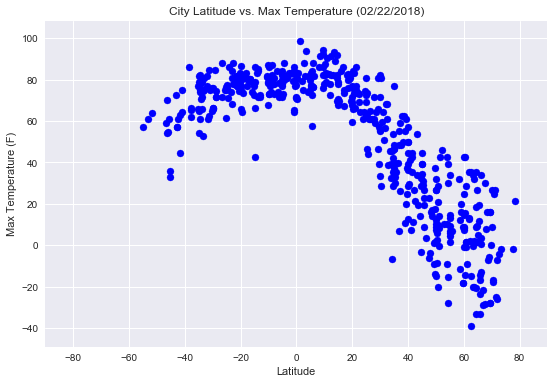

In [13]:
# create subplot to show relationship between latitude and max temperation
fig,ax = plt.subplots(figsize=(9,6))
# use Seaborn style
sns.set()
# plot a scatter
ax.scatter(lat,temp_max,c='b')
# set x and y axis limits
ax.set_xlim([-90,90])
ax.set_ylim(min(temp_max) - 10,max(temp_max) + 10)
# set plot title, including analysis date
ax.set_title('City Latitude vs. Max Temperature (' + current_date + ')')
# set lebels for x and y axis
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
# save plot
plt.savefig('latitude_vs_temporature')
# show plot
plt.show()

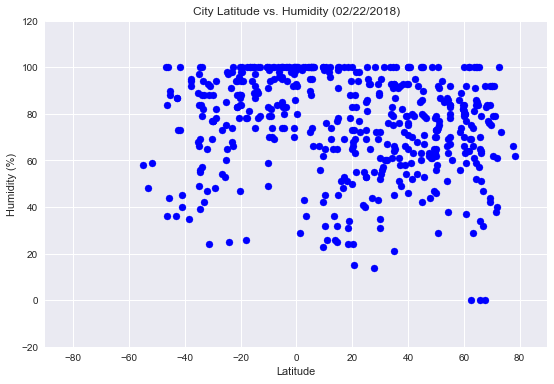

In [10]:
# create subplot to show relationship between latitude and humidity
fig,ax = plt.subplots(figsize=(9,6))
# use Seaborn style
sns.set()
# plot a scatter
ax.scatter(lat,humidity,c='b')
# set x and y axis limits
ax.set_xlim([-90,90])
ax.set_ylim(-20,120)
# set plot title, including analysis date
ax.set_title('City Latitude vs. Humidity (' + current_date + ')')
# set lebels for x and y axis
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
# save plot
plt.savefig('latitude_vs_humidity')
# show plot
plt.show()

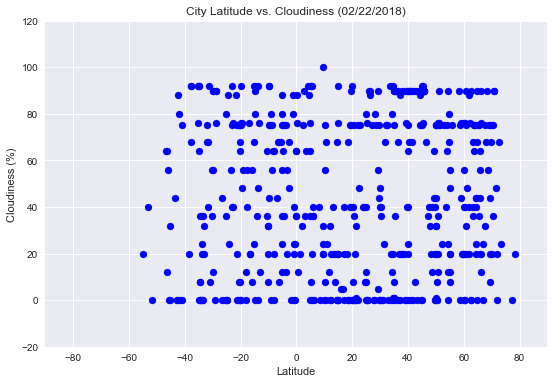

In [11]:
# create subplot to show relationship between latitude and cloudiness
fig,ax = plt.subplots(figsize=(9,6))
# use Seaborn style
sns.set()
# plot a scatter
ax.scatter(lat,cloudiness,c='b')
# set x and y axis limits
ax.set_xlim([-90,90])
ax.set_ylim(-20,120)
# set plot title, including analysis date
ax.set_title('City Latitude vs. Cloudiness (' + current_date + ')')
# set lebels for x and y axis
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
# save plot
plt.savefig('latitude_vs_cloudiness')
# show plot
plt.show()

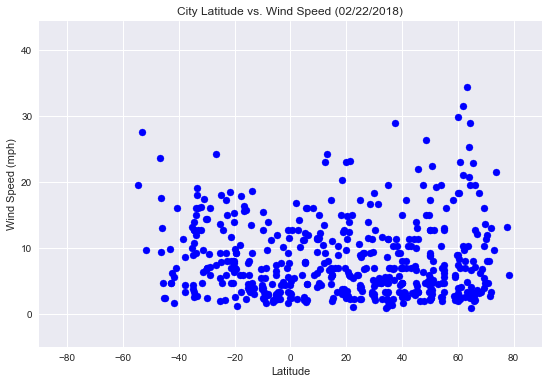

In [12]:
# create subplot to show relationship between latitude and wind speed
fig,ax = plt.subplots(figsize=(9,6))
# use Seaborn style
sns.set()
# plot a scatter
ax.scatter(lat,windspeed,c='b')
# set x and y axis limits
ax.set_xlim([-90,90])
ax.set_ylim(-5,max(windspeed) + 10)
# set plot title, including analysis date
ax.set_title('City Latitude vs. Wind Speed (' + current_date + ')')
# set lebels for x and y axis
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
# save plot
plt.savefig('latitude_vs_windspeed')
# show plot
plt.show()